# Simple Linear Regression. Minimal example

## Import relevant libraries

In [1]:
import numpy as np #mathematical operations
import matplotlib.pyplot as plt #nice graphs
from mpl_toolkits.mplot3d import Axes3D #nice 3D graphs


## Generate random input data (x and z) to train on 

In [2]:
observations = 1000

xs=np.random.uniform(low=-10,high=10,size=(observations,1))
zs=np.random.uniform(-10,10,(observations,1))

inputs = np.column_stack((xs,zs))

print (inputs.shape)

(1000, 2)


## Create the targets we will aim at 

In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs-3*zs+5+noise

print (targets.shape)

(1000, 1)


## Plot the training data 

The point is to see that there is a strong trend that our model should learn to reproduce

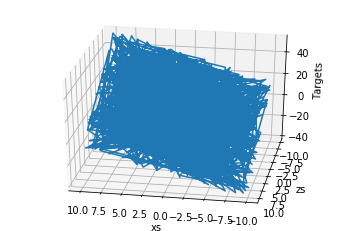

In [11]:
# In order to use the 3D plot, the objects should have a certain shape, so we reshape the targets.
# The proper method to use is reshape and takes as arguments the dimensions in which we want to fit the object.
targets = targets.reshape(observations,)

#Plotting according to the conventional matplotlib.pyplot syntax

#Declare the figure
fig = plt.figure()

#A method allowing us to create the 3D plot
ax = fig.add_subplot(111,projection ='3d')

# Choose the axes for different variables plots (x,z and output i.e. targets)
ax.plot(xs,zs,targets)

#Set Labels
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

# You can fiddle with the azim parameter to plot the data from different angles. Just change the value of azim=100
#to azim = 0; azim =200, or whatever. Check and see what happens.
ax.view_init(azim=100)

# So far we are just describing the plot.This method actually shows the plot.
plt.show()

#Turning datas into array 1
targets = targets.reshape(observations,1)

# Neural Network implementation begins

### Initialize variables for weights and biases (w and b)

In [5]:
init_range = 0.1
weights = np.random.uniform(-init_range,init_range,size=(2,1))

biases = np.random.uniform(-init_range,init_range,size =1)

print(weights)
print(biases)

[[0.03159943]
 [0.03369301]]
[-0.01418504]


### Set a learning rate ,eta

In [6]:
learning_rate = 0.02

### Train the model

In [7]:
for i in range(100):
    outputs = np.dot(inputs,weights)+biases
    deltas = outputs-targets
    
    loss = np.sum(deltas**2)/2/observations
    
    print (loss)
    
    deltas_scaled = deltas/observations
    
    weights = weights-learning_rate*np.dot(inputs.T,deltas_scaled)
    biases = biases-learning_rate*np.sum(deltas_scaled)
    

224.12392061699077
39.9931184819163
15.249932611062192
11.568340799707995
10.704068422706877
10.231708232316985
9.826186575307025
9.443211073257153
9.076260477991061
8.723937276332203
8.385559183321948
8.06056069920974
7.748410935673512
7.448601668350641
7.160644994504933
6.884072331531908
6.618433625986503
6.363296617323525
6.11824613396436
5.88288341763526
5.656825474477985
5.439704451821822
5.2311670395953405
5.030873895402735
4.838499092329076
4.653729588575901
4.476264718064142
4.305815701175359
4.142105174835289
3.9848667411749163
3.8338445340346814
3.688792802606397
3.5494755115353835
3.4156659568320538
3.2871463969679677
3.163707698556046
3.0451489960383613
2.931277364827779
2.821907507371516
2.7168614516257894
2.615968261450911
2.5190637584555344
2.4259902548374566
2.3365962967862246
2.250736418029996
2.1682709031256295
2.0890655601067967
2.0129915021201827
1.9399249376944103
1.8697469693004432
1.802343399875639
1.7376045469966317
1.6754250643986783
1.6157037705509925
1.558343

### Print the weights and biases if we have worked correctly

In [8]:
print (weights,biases)

[[ 1.99478883]
 [-3.00304791]] [4.31701616]


In [9]:
print (weights.shape,inputs.shape,deltas_scaled.shape)

(2, 1) (1000, 2) (1000, 1)


### Plot last outputs vs targets

Since they are the last ones at the end of the training, they represent the final model accuracy.

The closer this plot is to a 45 degree line, the closer target and output values are. 

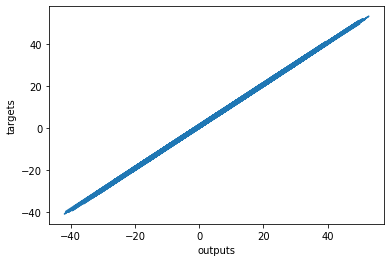

In [10]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()